In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_disease_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
## We have null values in iur dataset, which we need to handle

C:\Users\abhay\AppData\Local\Temp\ipykernel_17164\230510291.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


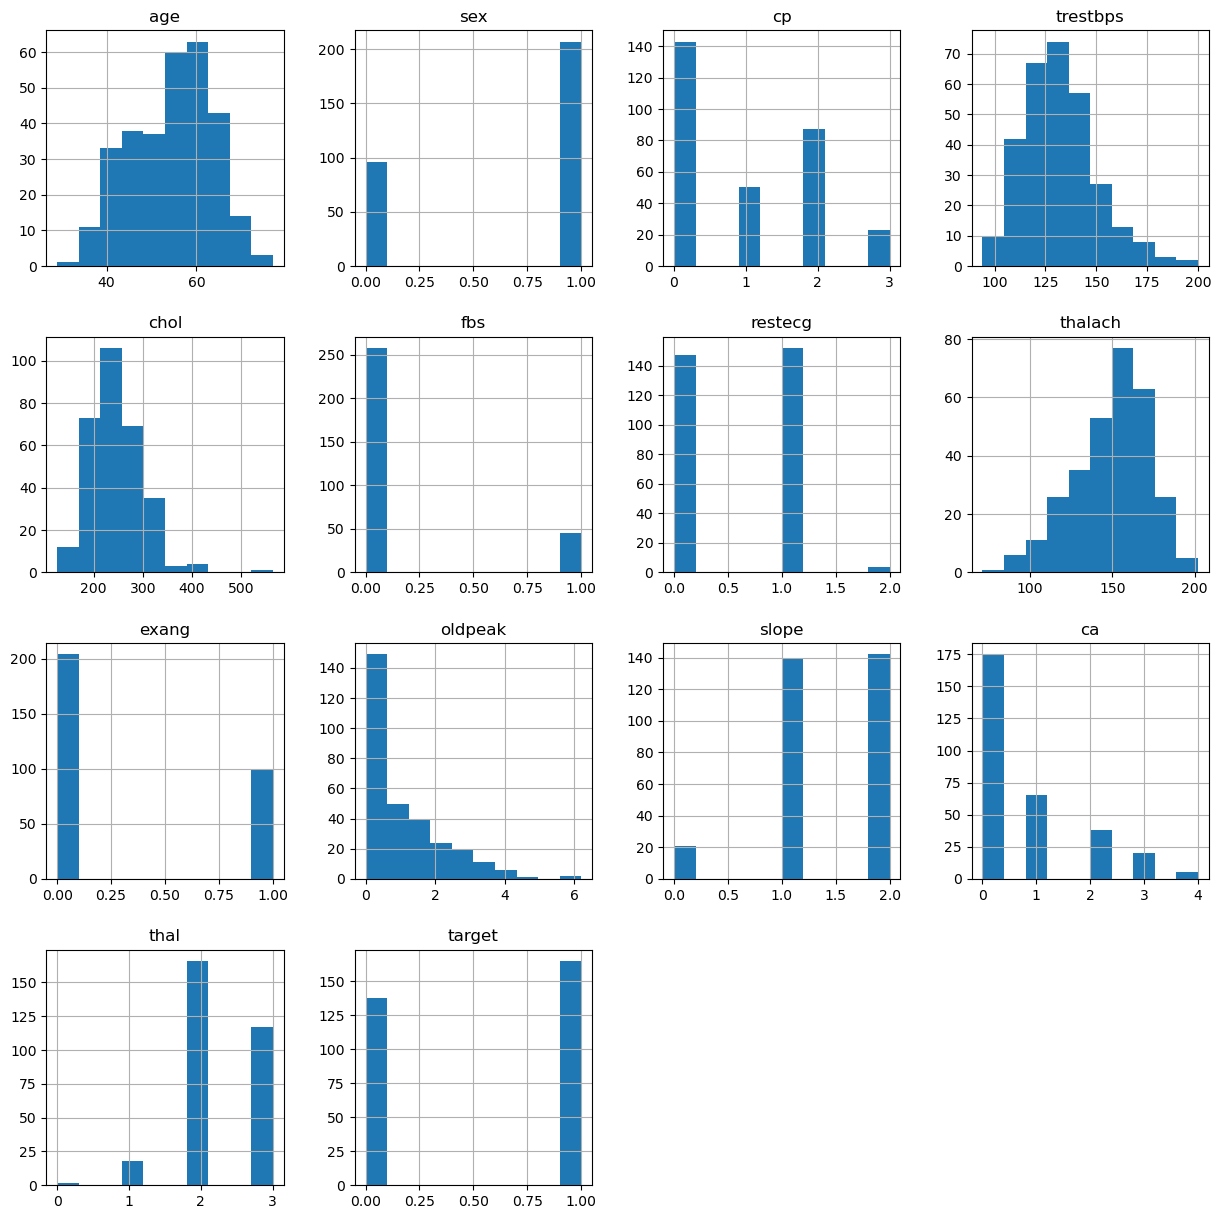

In [6]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
from sklearn.preprocessing import Imputer
Imput = Imputer(missing_values='NaN',strategy='mean')
df = list(imput.fit_transform(df))

for i in range(303):
    for j in range(14):
        df[i][j] = math.ceil(df[i][j])

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\abhay\anaconda3\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [ ]:
df = pd.DataFrame(df)

In [9]:
df=df.rename(columns={0: 'age', 1:'sex', 2:'cp', 3:'trestbps',4: 'chol',5: 'fbs',6: 'restecg',7: 'thalach',8: 'exang',9: 'old

SyntaxError: unterminated string literal (detected at line 1) (476271505.py, line 1)

In [11]:
## Let's find out the most important features in the dataset that will play a major role in predicting the class label

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
x = df.iloc[:,:-1]

In [14]:
y = df.iloc[:,-1]

In [15]:
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(x,y)
pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)

cp          0.129161
oldpeak     0.117608
thal        0.112903
thalach     0.104084
ca          0.097922
age         0.088389
chol        0.081758
trestbps    0.076915
exang       0.067250
slope       0.055348
sex         0.037139
restecg     0.021520
fbs         0.010004
dtype: float64

C:\Users\abhay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


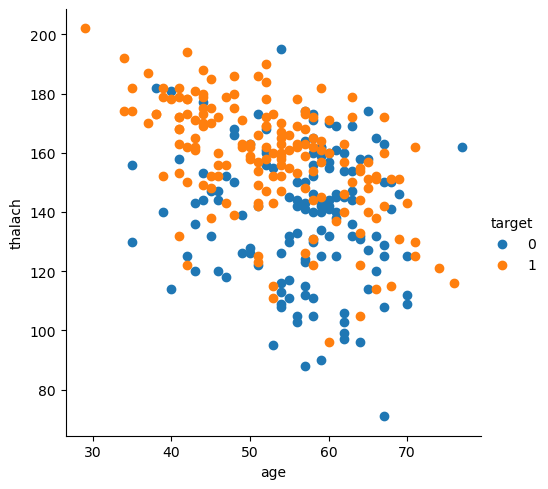

In [16]:
sns.FacetGrid(df, hue="target", height=5) \
   .map(plt.scatter, "age", "thalach") \
   .add_legend()
plt.show()

C:\Users\abhay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


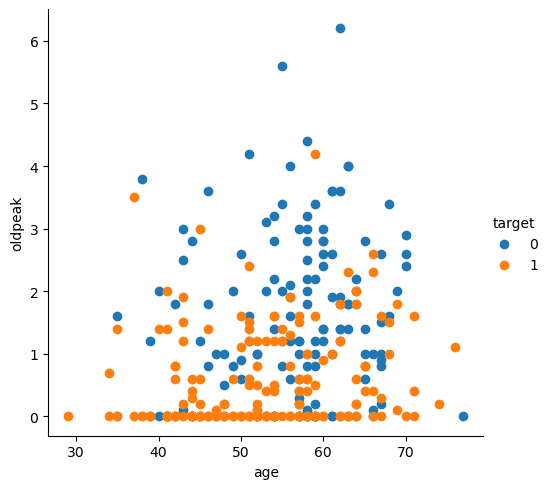

In [17]:
sns.FacetGrid(df, hue="target", height=5) \
   .map(plt.scatter, "age", "oldpeak") \
   .add_legend()
plt.show()

C:\Users\abhay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


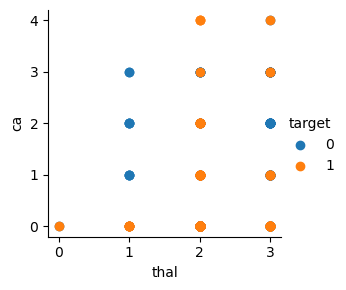

In [18]:
sns.FacetGrid(df, hue="target", height=3) \
   .map(plt.scatter, "thal", "ca") \
   .add_legend()
plt.show()

C:\Users\abhay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


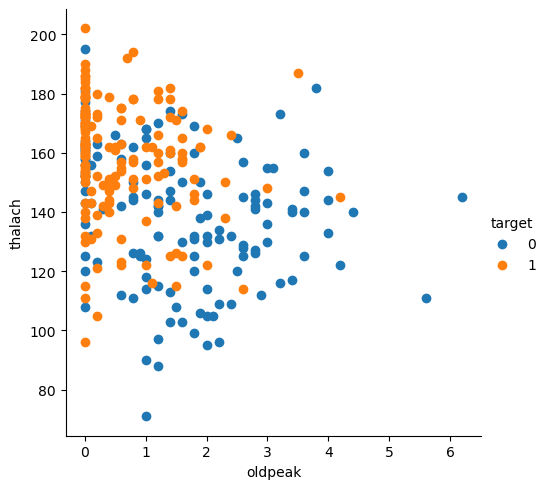

In [19]:
sns.FacetGrid(df, hue="target", height=5) \
   .map(plt.scatter, "oldpeak", "thalach") \
   .add_legend()
plt.show()

C:\Users\abhay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


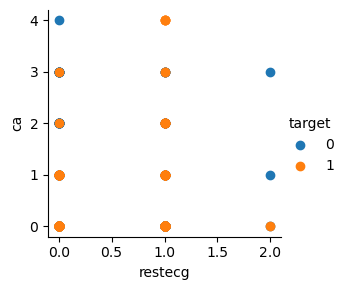

In [20]:
sns.FacetGrid(df, hue="target", height=3) \
   .map(plt.scatter, "restecg", "ca") \
   .add_legend()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [22]:
# For 'cp' column, it records chest pain type. Number 3 mean no chest pain, number 0-2 means different tyoe of angina. 

# To simplify it, I will group the number 0-2 together as disease positive, number 3 as disease negative

In [23]:
number=[0,1,2]
for col in df.itertuples():

    if col.cp in number:
        df['cp'].replace(to_replace=col.cp, value=1, inplace=True)

In [24]:
#Testing the accuracy when the top 8 features are used for fitting

In [25]:
df_top8 = df.loc[:,['cp','oldpeak','thal','ca','thalach','age','chol','trestbps','exang']]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(df_top8,y,test_size=0.25,random_state=0)
clf = AdaBoostClassifier()
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])

Accuracy:  0.8026315789473685


Confusion Matrix:  [[27  9]
 [ 6 34]]


Precision:  [0.81818182 0.79069767]
Recall:     [0.75 0.85]
Fscore:     [0.7826087  0.81927711]
Support:    [36 40]


In [27]:
#Maybe, Standardization could hep ?

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
x = df.iloc[:,:-1]
x_std = StandardScaler().fit_transform(x)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.25,random_state=0)
clf = AdaBoostClassifier()
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])

Accuracy:  0.8289473684210527


Confusion Matrix:  [[26  6]
 [ 7 37]]


Precision:  [0.78787879 0.86046512]
Recall:     [0.8125     0.84090909]
Fscore:     [0.8        0.85057471]
Support:    [32 44]


In [31]:
## Not much of a difference using Standardization

In [32]:
#Accuracy with different test sizes

In [33]:
testSize = [0.5,0.4,0.3,0.25,0.2,0.15,0.1]

acc = []
for i in testSize:
    x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=i)
    clf = AdaBoostClassifier()
    clf.fit(x_train,y_train)
    prediction=clf.predict(x_test)
    acc.append(accuracy_score(prediction,y_test))

models_dataframe=pd.DataFrame(acc,index=testSize)   
models_dataframe

,0
0.50,0.796053
0.40,0.827869
0.30,0.747253
0.25,0.750000
0.20,0.770492
0.15,0.695652
0.10,0.774194
